In [11]:
#import library yang dibutuhkan
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import time
import itertools

In [12]:
#baca dataset .txt
datasetPath = "dataku.txt"
dataset = np.loadtxt(datasetPath, delimiter=" ")

In [13]:
#mendefinisikan parameter k-means klustering
k = 2 #jumlah klaster yang diinginkan
iterationCounter = 0 #counter untuk iterasi
input = dataset

#fungsi untuk inisialisi titik pusat klaster (random)
def initCentroid(dataIn, k):
    result = dataIn[np.random.choice(dataIn.shape[0], k, replace=False)]
    return result

In [42]:
#fungsi untuk plot hasil klaster per iterasi
def plotClusterResult(listClusterMembers, centroid, iteration, converged):
    n = listClusterMembers.__len__()
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    plt.figure("result")
    plt.clf()
    plt.title("iteration-" + iteration)
    marker = itertools.cycle(('.', '*', '^', 'x', '+'))
    for i in range(n):
        col = next(color)
        memberCluster = np.asmatrix (listClusterMembers[i])
        plt.scatter(np.ravel (memberCluster [:, 0]), np.ravel (memberCluster [:, 1]), marker=marker.__next__(), s=100, c=col, label="klaster-"+str(i+1))
    for i in range(n):
        plt.scatter((centroid [i, 0]), (centroid[i, 1]), marker=marker.__next__(), c=col, label="centroid-" + str(i + 1))
    if(converged == 0):
      plt.legend()
      plt.ion()
      plt.show()
      plt.pause(0.1)
    if (converged == 1):
      plt.legend()
      plt.show(block=True)

In [43]:
#fungsi utama algoritma k-means
def kMeans (data, centroidInit):
    nCluster = k #banyaknya klaster
    global iterationCounter
    centroidInit = np.matrix(centroidInit)
    # looping hingga konvergen
    while(True):
        iterationCounter +=1
        euclideanMatrixAllCluster = np.ndarray(shape=(data.shape[0], 0))
        #ulangi proses untuk semua klaster
        for i in range(0, nCluster):
            centroidRepeated = np.repeat (centroidInit [i,:], data.shape[0], axis=0)
            deltaMatrix = abs(np.subtract (data, centroidRepeated))
            #hitung jarak Euclidean
            euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
            euclideanMatrixAllCluster = \
                np.concatenate ((euclideanMatrixAllCluster, euclideanMatrix), axis=1)
        #tempatkan data ke klaster yang jarak Euclideannya plg dekat
        clusterMatrix = np.ravel(np.argmin(np.matrix (euclideanMatrixAllCluster), axis=1))
        listClusterMember = [[] for i in range(k)]
        for i in range(0, data.shape[0]): #assign data to cluster regarding cluster matrix
           listClusterMember[clusterMatrix[i].item()].append(data[i,:])
        #hitung titik pusat klaster terbaru
        newCentroid = np.ndarray(shape=(0, centroidInit.shape[1]))
        for i in range(0,nCluster):
            memberCluster = np.asmatrix(listClusterMember[i])
            centroidCluster = memberCluster.mean(axis=0)
            newCentroid = np.concatenate((newCentroid, centroidCluster), axis=0)
        print("iter:", iterationCounter)
        print("centroid: ", newCentroid)
        #break dari loop jika sudah konvergen
        if((centroidInit == newCentroid).all()):
            break
        # update titik pusat klaster dengan nilai yg baru
        centroidInit = newCentroid
        #plot hasil klaster per iterasi
        plotClusterResult(listClusterMember, centroidInit, str(iterationCounter), 0)
        time.sleep(1) #diberi jeda 1 detik agak hasil plot klaster nyaman dilihat
    return listClusterMember, centroidInit

iter: 12
centroid:  [[  0.23360522  -0.04505561]
 [-13.76665294   2.69097059]]


<ipython-input-42-16e23da1f1c2>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.ravel (memberCluster [:, 0]), np.ravel (memberCluster [:, 1]), marker=marker.__next__(), s=100, c=col, label="klaster-"+str(i+1))
<ipython-input-42-16e23da1f1c2>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((centroid [i, 0]), (centroid[i, 1]), marker=marker.__next__(), c=col, label="centroid-" + str(i + 1))


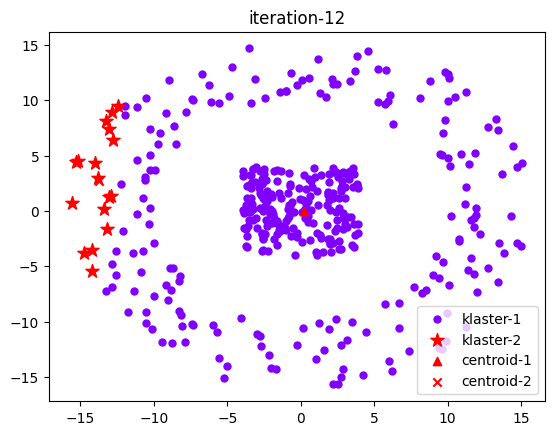

iter: 13
centroid:  [[  1.89397143  -0.19520699]
 [-10.81237887   1.30582113]]


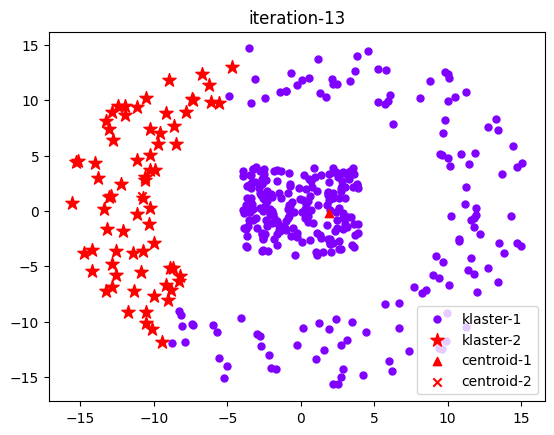

iter: 14
centroid:  [[  2.19055063  -0.05581509]
 [-10.25801707   0.56389512]]


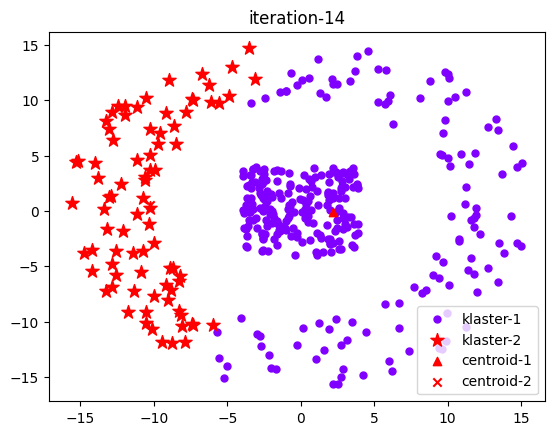

iter: 15
centroid:  [[ 2.30923706  0.13025623]
 [-9.96958046 -0.14114943]]


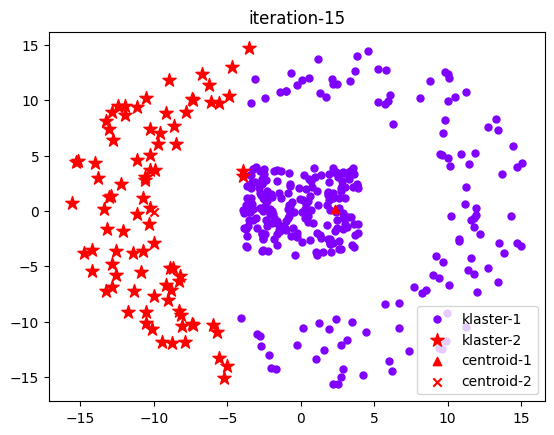

iter: 16
centroid:  [[ 2.37118806  0.21531903]
 [-9.77367333 -0.42509667]]


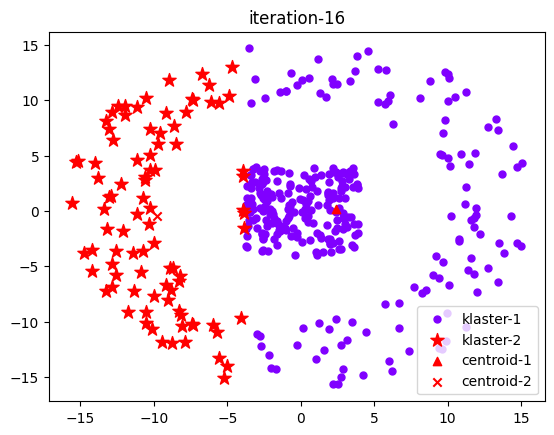

iter: 17
centroid:  [[ 2.47059344  0.25086098]
 [-9.45361368 -0.50549895]]


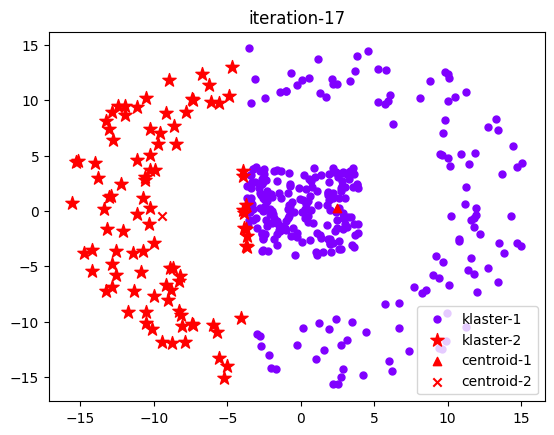

iter: 18
centroid:  [[ 2.61081913  0.28991745]
 [-9.04496471 -0.56769804]]


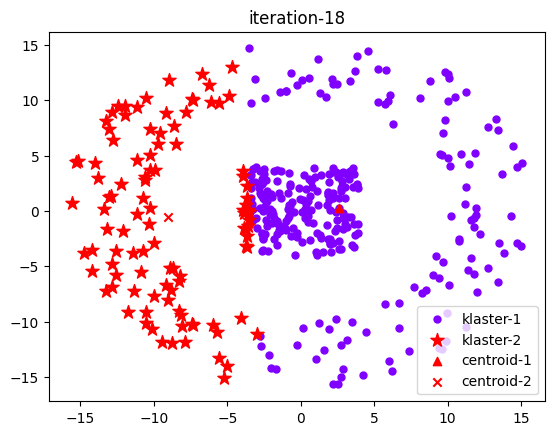

iter: 19
centroid:  [[ 2.81452014  0.36597465]
 [-8.52807232 -0.68670089]]


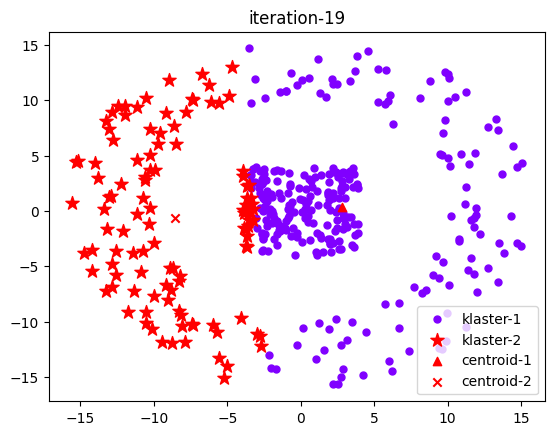

iter: 20
centroid:  [[ 3.05976522  0.51165906]
 [-7.97627016 -0.90909435]]


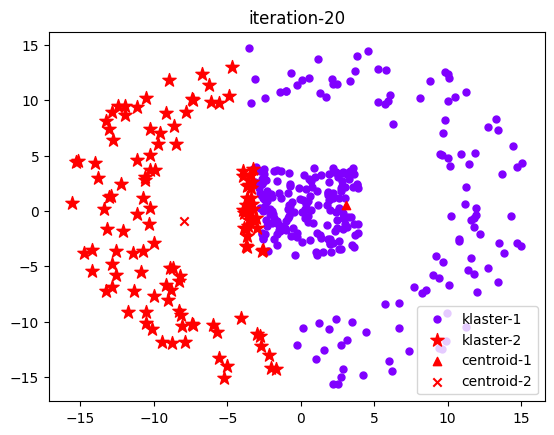

iter: 21
centroid:  [[ 3.38990843  0.54269004]
 [-7.40524029 -0.81404245]]


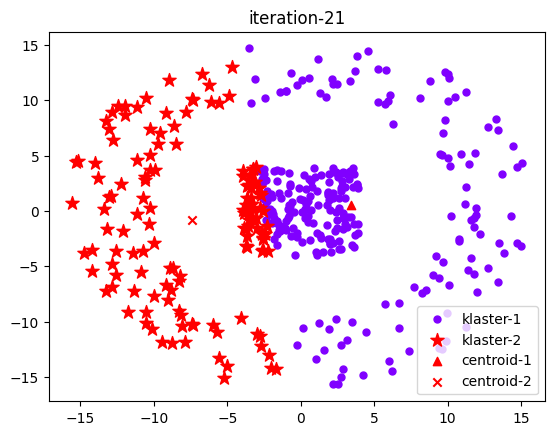

iter: 22
centroid:  [[ 3.92293891  0.45110126]
 [-6.72139565 -0.49268944]]


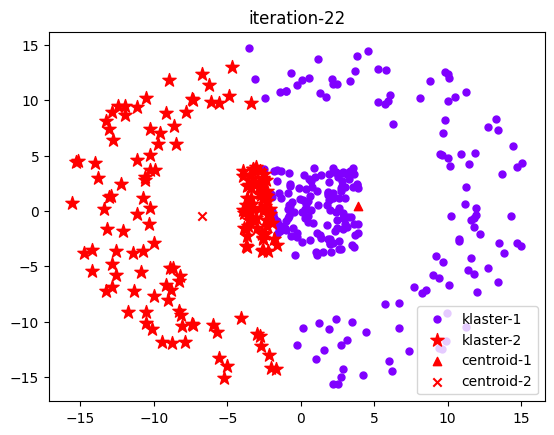

iter: 23
centroid:  [[ 4.34931704  0.31780538]
 [-6.29638418 -0.23943729]]


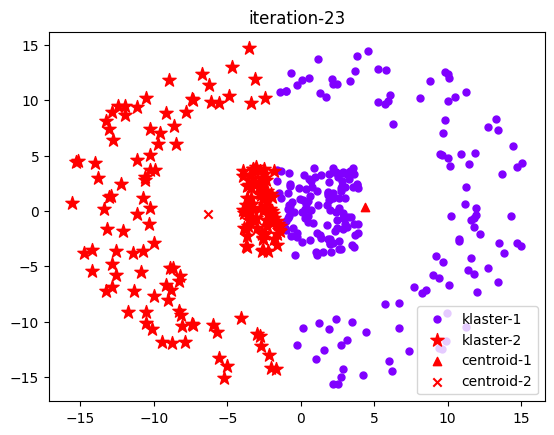

iter: 24
centroid:  [[ 4.55951209  0.2893986 ]
 [-6.08031027 -0.18232703]]


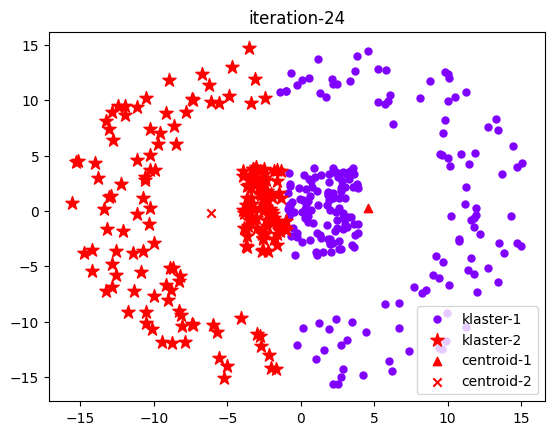

iter: 25
centroid:  [[ 4.76714348  0.31388986]
 [-5.86197409 -0.18904145]]


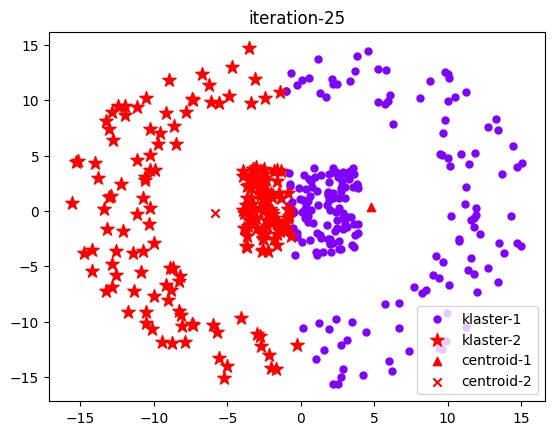

iter: 26
centroid:  [[ 4.957455   0.306831 ]
 [-5.6802665 -0.16438  ]]


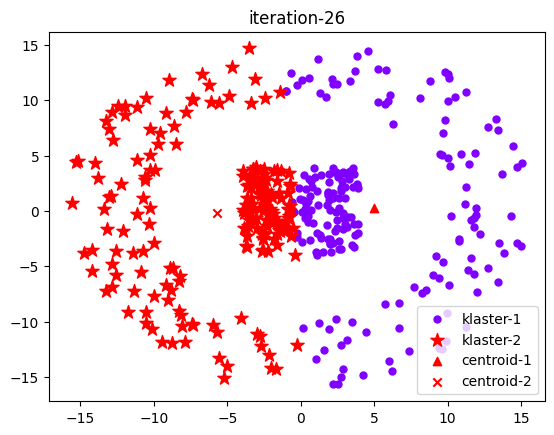

iter: 27
centroid:  [[ 5.12909794  0.22340979]
 [-5.53207427 -0.07209369]]


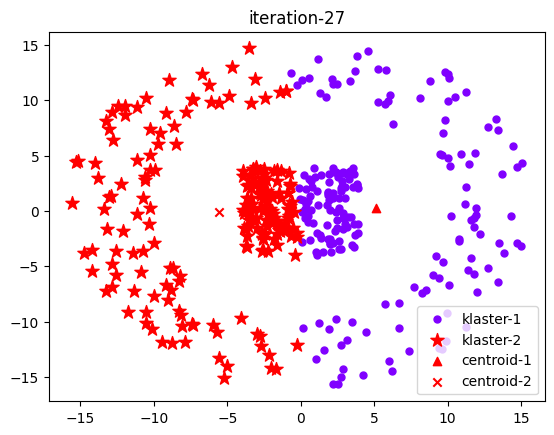

iter: 28
centroid:  [[ 5.15917047  0.15990311]
 [-5.50860966 -0.01145459]]


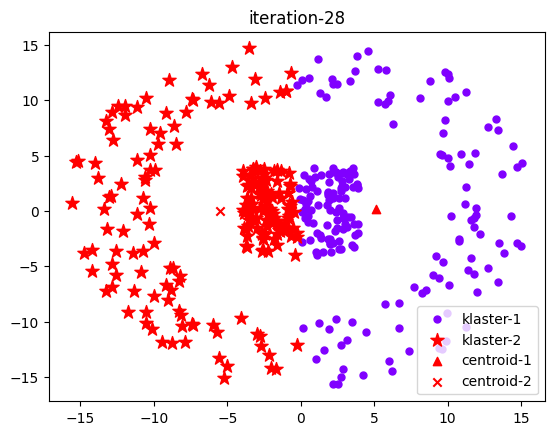

iter: 29
centroid:  [[ 5.15917047  0.15990311]
 [-5.50860966 -0.01145459]]


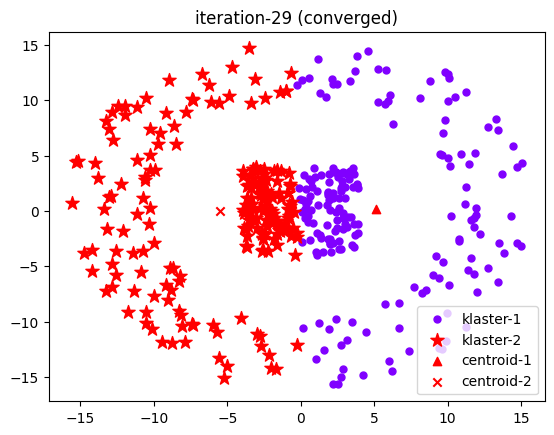

In [44]:
centroidInit = initCentroid(input, k)
clusterResults, centroid = kMeans(input, centroidInit)
plotClusterResult(clusterResults, centroid, str(iterationCounter) + " (converged)", 1)